In [120]:
import pandas as pd

longlat = pd.read_csv('longlat.csv', encoding='utf-8')
longlat.head()

,location,lats,longs
0,تهران،تهران،بهشت زهرا,51.374920,35.543032
1,تهران،تهران،بزرگراه اشرفی اصفهانی,51.331410,35.750876
2,تهران،تهران،چهارباغ پایین,51.408135,35.810296
3,تهران،تهران،کرمان,51.473930,35.733026
4,تهران،تهران،ورامین,51.588740,35.407362


In [220]:
states = gpd.read_file('iranlocations/polbnda_irn.shp')
states = states[states['nam']=='TEHRAN']
type(states)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

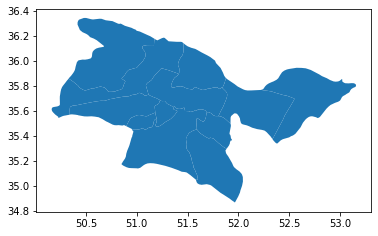

In [221]:
states.plot()

In [203]:
df = pd.read_csv('catering_destinations.csv')
df = df.rename(columns={'Unnamed: 0': 'location', '0': 'count'})
df.head()

,location,count
0,تهران،تهران،سعادت آباد,8921
1,تهران،تهران،شهرک غرب,6254
2,تهران،تهران،تهرانپارس (منطقه ۴),4410
3,تهران،تهران،ستارخان,4408
4,تهران،تهران،پونک,3859


In [204]:
df = pd.merge(df,longlat,how='inner',left_on=['location'],right_on=['location'])

In [205]:
df[["longs", "lats"]] = df[["longs", "lats"]].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 0 to 611
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  612 non-null    object 
 1   count     612 non-null    int64  
 2   lats      612 non-null    float64
 3   longs     612 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 23.9+ KB


In [213]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['lats'], df['longs'])]

In [214]:
gdf = GeoDataFrame(df, geometry=geometry)   

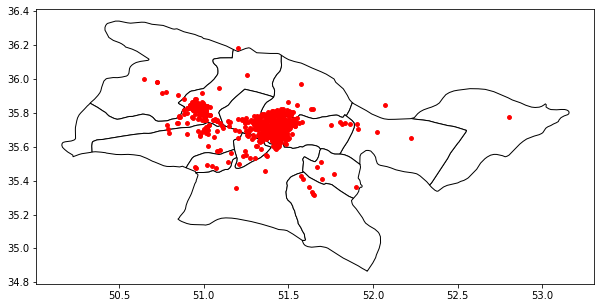

In [215]:
ax = states.plot(figsize=(10, 6), color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=15).get_figure().savefig('./maps/catering_destinations.png')

In [129]:
df.lats.min()

50.01392059700368

In [212]:
df = df[df.lats > df.lats.min()]